In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load in Vendor File
vendor_file = "../reference-table/VendorMacAddress.csv"
vd_df = pd.read_csv(vendor_file, engine='python', delimiter=':')
vd_df.head(10)

,MacAddressPrefix,Vendor
0,000000,Officially Xerox
1,000001,SuperLAN-2U
2,000002,"BBN (was internal usage only, no longer used)"
3,000003,XEROX CORPORATION
4,000004,XEROX CORPORATION
5,000005,XEROX CORPORATION
6,000006,XEROX CORPORATION
7,000007,XEROX CORPORATION
8,000008,XEROX CORPORATION
9,000009,powerpipes?


In [3]:
#Load in User Log from All Succesfully File
#Get all file path
path = "../sortlog/"
dirs=[]
for file in os.listdir(path):
    if os.path.isdir(path+file):
        dirs.append(file)
full_user_df = pd.DataFrame()
#Files that will be handled (logtype, file)
StatusCode=[("info", "successfully"),("info", "authentication"),("info", "disconnection")]
#Join all csv into one dataframe
for log_type, status in StatusCode:
    for dirtory in dirs:
        user_file = "../sortlog/" + dirtory + "/" + dirtory + "-" + log_type + "-formatted/" + dirtory + "-" + status+ "-formatted.csv"
        input_df = pd.read_csv(user_file, engine='python')
        frames = [full_user_df,input_df]
        full_user_df = pd.concat(frames, sort=False)
full_user_df.head(10)

,Time,StatusCode,UserName,UserMacAddress,SSID,APID,BSSID,VLanID,ReasonCode,VLANID,PortNum,Cause,VLANList
0,00:00:00,Successfully Join,1454197190036643,1C:5C:F2:CF:D1:B0,CSL Auto Connect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00:00:01,Successfully Join,NaN,58:44:98:21:F3:AD,HKU,603.0,80:F6:2E:53:57:23,NaN,NaN,NaN,NaN,NaN,NaN
2,00:00:06,Successfully Join,NaN,74:81:14:99:D4:63,Wi-Fi.HK via HKU,123.0,38:22:D6:AE:F3:92,NaN,NaN,NaN,NaN,NaN,NaN
3,00:00:06,Successfully Join,NaN,84:29:99:69:11:B5,eduroam,106.0,00:23:89:6A:B8:E1,NaN,NaN,NaN,NaN,NaN,NaN
4,00:00:08,Successfully Join,NaN,04:4B:ED:3F:AB:EE,HKU,102.0,58:66:BA:AB:71:F3,NaN,NaN,NaN,NaN,NaN,NaN
5,00:00:13,Successfully Join,NaN,58:44:98:21:F3:AD,HKU,194.0,00:23:89:60:77:63,NaN,NaN,NaN,NaN,NaN,NaN
6,00:00:14,Successfully Join,u3527213,58:44:98:21:F3:AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,00:00:15,Successfully Join,NaN,70:48:0F:75:FB:D6,eduroam,234.0,70:BA:EF:C9:FB:C1,NaN,NaN,NaN,NaN,NaN,NaN
8,00:00:15,Successfully Join,NaN,1C:5C:F2:CF:D1:B0,Wi-Fi.HK via HKU,100.0,58:66:BA:A0:8F:92,NaN,NaN,NaN,NaN,NaN,NaN
9,00:00:16,Successfully Join,s1155029155,70:48:0F:75:FB:D6,eduroam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Trim the full user dataframe into UserMacAddress only -Select UserMacAddress from full_user_df
user_df = pd.DataFrame()
user_df["UserMacAddress"] = full_user_df["UserMacAddress"]
user_df.head(5)

,UserMacAddress
0,1C:5C:F2:CF:D1:B0
1,58:44:98:21:F3:AD
2,74:81:14:99:D4:63
3,84:29:99:69:11:B5
4,04:4B:ED:3F:AB:EE


In [5]:
#Create MacAddressPrefx Column for mapping
user_df['MacAddressPrefix'] = user_df['UserMacAddress'].str.replace(':','')
user_df['MacAddressPrefix'] = user_df['MacAddressPrefix'].str.slice(stop=6)
user_df.head(5)

,UserMacAddress,MacAddressPrefix
0,1C:5C:F2:CF:D1:B0,1C5CF2
1,58:44:98:21:F3:AD,584498
2,74:81:14:99:D4:63,748114
3,84:29:99:69:11:B5,842999
4,04:4B:ED:3F:AB:EE,044BED


In [6]:
#Remove Row with duplicate User Mac Address 
#Distinct UserMacAddress
user_df.drop_duplicates(subset="UserMacAddress", inplace= True)
user_df.head(10)

,UserMacAddress,MacAddressPrefix
0,1C:5C:F2:CF:D1:B0,1C5CF2
1,58:44:98:21:F3:AD,584498
2,74:81:14:99:D4:63,748114
3,84:29:99:69:11:B5,842999
4,04:4B:ED:3F:AB:EE,044BED
7,70:48:0F:75:FB:D6,70480F
10,F4:09:D8:B7:DF:1F,F409D8
12,00:27:10:4B:84:28,002710
13,90:B6:86:78:2B:24,90B686
17,3C:A9:F4:81:5E:60,3CA9F4


In [7]:
#Natural Join Two Dataframes by MacAddressPrefix
joined_df = pd.merge(user_df, vd_df, on='MacAddressPrefix', how='inner')
joined_df.head(10)

,UserMacAddress,MacAddressPrefix,Vendor
0,1C:5C:F2:CF:D1:B0,1C5CF2,"Apple, Inc."
1,1C:5C:F2:A8:CB:2B,1C5CF2,"Apple, Inc."
2,1C:5C:F2:A8:25:F1,1C5CF2,"Apple, Inc."
3,1C:5C:F2:E1:01:15,1C5CF2,"Apple, Inc."
4,1C:5C:F2:EF:FD:44,1C5CF2,"Apple, Inc."
5,1C:5C:F2:6B:B4:7C,1C5CF2,"Apple, Inc."
6,1C:5C:F2:42:EF:BB,1C5CF2,"Apple, Inc."
7,1C:5C:F2:F0:F9:F7,1C5CF2,"Apple, Inc."
8,1C:5C:F2:D2:21:8A,1C5CF2,"Apple, Inc."
9,1C:5C:F2:8E:7F:BE,1C5CF2,"Apple, Inc."


In [8]:
#Group By Vendor and Count *
joined_df = joined_df.Vendor.value_counts()
joined_df.sort_values(ascending=False, inplace=True)
joined_df.head(5)

Apple, Inc.                            18937
Samsung Electronics Co.,Ltd             1643
SAMSUNG ELECTRO-MECHANICS(THAILAND)     1125
Murata Manufacturing Co., Ltd.           988
Xiaomi Communications Co Ltd             978
Name: Vendor, dtype: int64

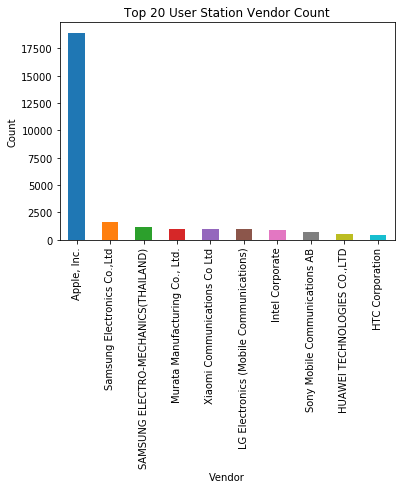

In [9]:
#Generate Chart
plt.title("Top 20 User Station Vendor Count")
plt.ylabel("Count")
plt.xlabel("Vendor")
joined_df.head(10).plot(kind="bar")

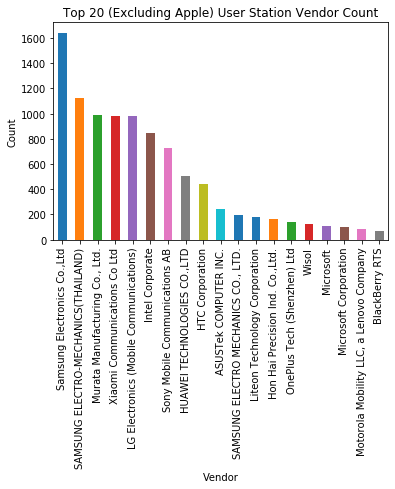

In [10]:
plt.title("Top 20 (Excluding Apple) User Station Vendor Count")
plt.ylabel("Count")
plt.xlabel("Vendor")
joined_df.iloc[1:20].plot(kind="bar")